# Real-world proxy experiments with GraphEM and PAGES2k

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import os
os.chdir('/glade/u/home/fengzhu/Github/cfr/docsrc/notebooks/')

## Create a reconstruction job object

In [2]:
job = cfr.ReconJob()

## Load a proxy database

In [3]:
job.load_proxydb('./data/pages2k_updated_Palmyra_dataset.pkl')

## Filter the proxy database

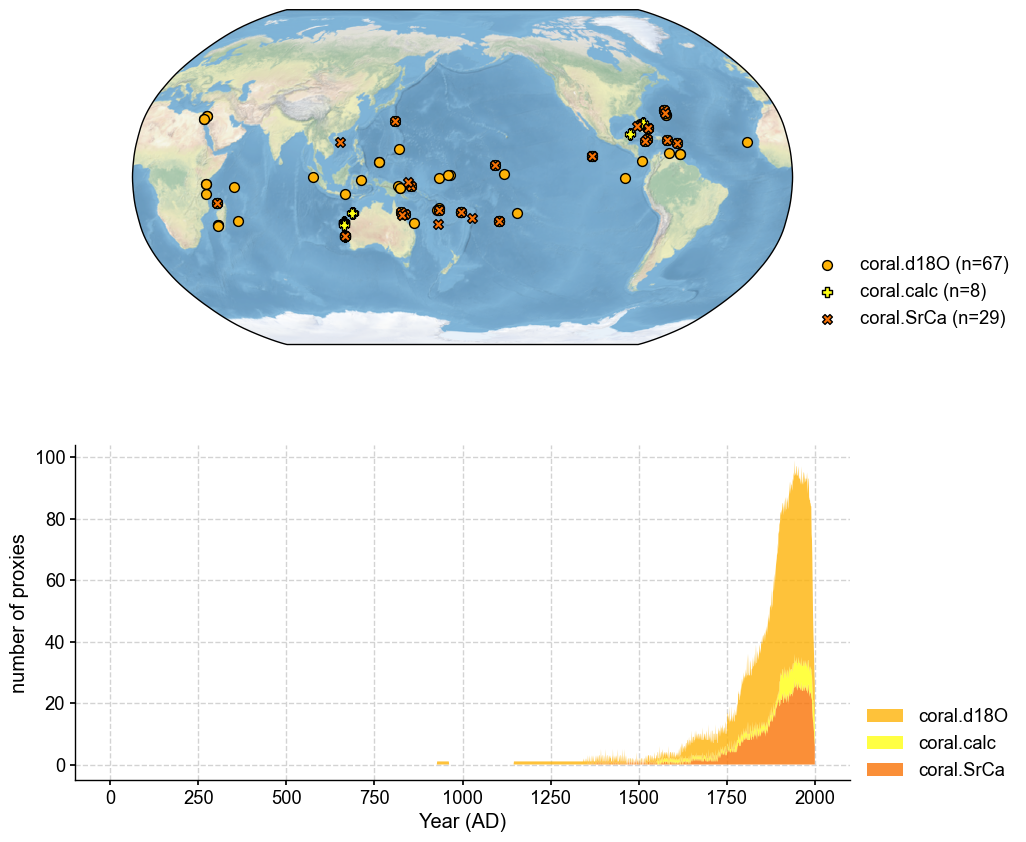

In [4]:
job.filter_proxydb(by='ptype', keys=['coral'])
# the .plot() method will generate a static map utilizing the Cartopy library
fig, ax = job.proxydb.plot(plot_count=True)

## Annualize/seasonalize the proxy database

>>> job.configs["annualize_proxydb_months"] = [12, 1, 2]
>>> job.configs["annualize_proxydb_ptypes"] = ['coral']


Annualizing ProxyDatabase: 100%|██████████| 104/104 [00:05<00:00, 19.51it/s]


>>> 104 records remaining
>>> job.proxydb updated


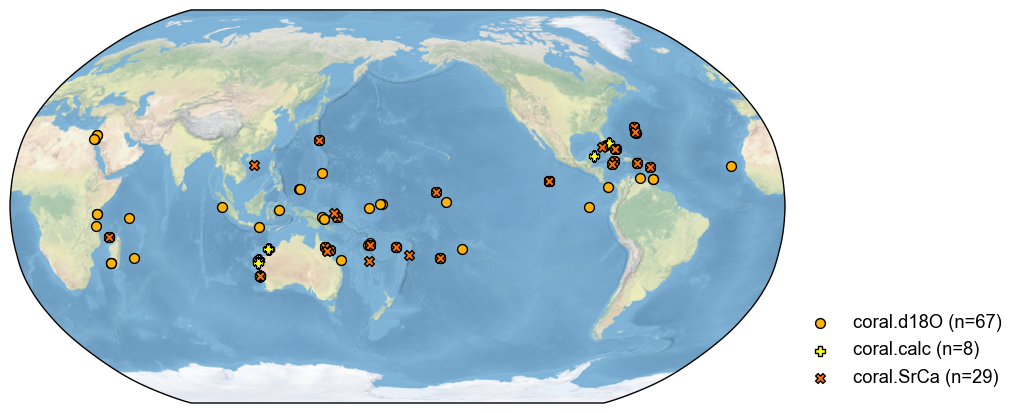

In [5]:
job.annualize_proxydb(months=[12, 1, 2], ptypes=['coral'], verbose=True)
fig, ax = job.proxydb.plot()

## Center the proxy values

In [6]:
job.center_proxydb(verbose=True)

>>> job.configs["proxydb_center_ref_period"] = [1951, 1980]


Centering each of the ProxyRecord:   0%|          | 0/104 [00:00<?, ?it/s]/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Centering each of the ProxyRecord: 100%|██████████| 104/104 [00:00<00:00, 1183.00it/s]

>>> job.proxydb updated


## Load instrumental observations

In [7]:
job.load_clim(
    tag='obs',
    path_dict={
        'tas': './data/air.2m.mon.mean.nc',
    },
    rename_dict={'tas': 'air'},
    anom_period=(1951, 1980),
    verbose=True,
)

>>> job.configs["obs_path"] = {'tas': './data/air.2m.mon.mean.nc'}
>>> job.configs["obs_rename_dict"] = {'tas': 'air'}
>>> job.configs["obs_anom_period"] = (1951, 1980)
>>> job.configs["obs_lat_name"] = lat
>>> job.configs["obs_lon_name"] = lon
>>> job.configs["obs_time_name"] = time
>>> obs variables ['tas'] loaded
>>> job.obs created


## Annualize/seasonalize the instrumental observations

In [8]:
job.annualize_clim(tag='obs', verbose=True, months=[12, 1, 2])

>>> job.configs["obs_annualize_months"] = [12, 1, 2]
>>> Processing tas ...
>>> job.obs updated


## Regrid the observation field

In [9]:
job.regrid_clim(tag='obs', nlat=42, nlon=63, verbose=True)
job.obs['tas'].da

>>> job.configs["obs_regrid_nlat"] = 42
>>> job.configs["obs_regrid_nlon"] = 63
>>> Processing tas ...


<xarray.DataArray 'tas' (time: 181, lat: 42, lon: 63)>
array([[[-1.17658234, -1.17658234, -1.17658234, ..., -1.17658234,
         -1.17658234, -1.17658234],
        [-1.20457068, -1.21422067, -1.24373588, ..., -1.17623352,
         -1.19435985, -1.20457068],
        [-1.04762715, -1.03410038, -1.11291994, ..., -1.08906642,
         -1.09019899, -1.04762715],
        ...,
        [-1.90436349, -2.00758206, -2.10353152, ..., -2.13694761,
         -1.93895908, -1.90436349],
        [-1.97859973, -2.02700135, -2.11031266, ..., -1.90404647,
         -1.93301715, -1.97859973],
        [-2.0943985 , -2.0943985 , -2.0943985 , ..., -2.0943985 ,
         -2.0943985 , -2.0943985 ]],

       [[-1.5336405 , -1.5336405 , -1.5336405 , ..., -1.5336405 ,
         -1.5336405 , -1.5336405 ],
        [-1.62735246, -1.66029814, -1.70882166, ..., -1.55432507,
         -1.59310699, -1.62735246],
        [-1.46549513, -1.51057101, -1.60662024, ..., -1.35856922,
         -1.44442422, -1.46549513],
...
        [ 5.01782118,  6.13371312,  7.38691499, ...,  3.70897745,
          4.27503033,  5.01782118],
        [ 4.39297504,  4.48469754,  4.5170273 , ...,  4.108468  ,
          4.25895646,  4.39297504],
        [ 4.15535975,  4.15535975,  4.15535975, ...,  4.15535975,
          4.15535975,  4.15535975]],

       [[ 0.49369812,  0.49369812,  0.49369812, ...,  0.49369812,
          0.49369812,  0.49369812],
        [ 1.18448285,  1.25474526,  1.30491908, ...,  1.0277446 ,
          1.10370976,  1.18448285],
        [ 1.54231039,  1.58106625,  1.58889036, ...,  1.60408827,
          1.64863604,  1.54231039],
        ...,
        [ 5.29101153,  7.31819586, 10.02714692, ...,  3.19078521,
          3.91287434,  5.29101153],
        [ 2.95391027,  2.98042183,  3.02410771, ...,  2.51976163,
          2.7927688 ,  2.95391027],
        [ 1.99179077,  1.99179077,  1.99179077, ...,  1.99179077,
          1.99179077,  1.99179077]]])
Coordinates:
  * time     (time) int64 1836 1837 1838 1839 1840 ... 2012 2013 2014 2015 2016
  * lat      (lat) float64 -90.0 -85.61 -81.22 -76.83 ... 76.83 81.22 85.61 90.0
  * lon      (lon) float64 0.0 5.806 11.61 17.42 ... 342.6 348.4 354.2 360.0
Attributes:
    annualized:  1

## Crop the observation field

>>> job.configs["prior_lat_min"] = -25
>>> job.configs["prior_lat_max"] = 25
>>> job.configs["prior_lon_min"] = 120
>>> job.configs["prior_lon_max"] = 280
>>> Processing tas ...


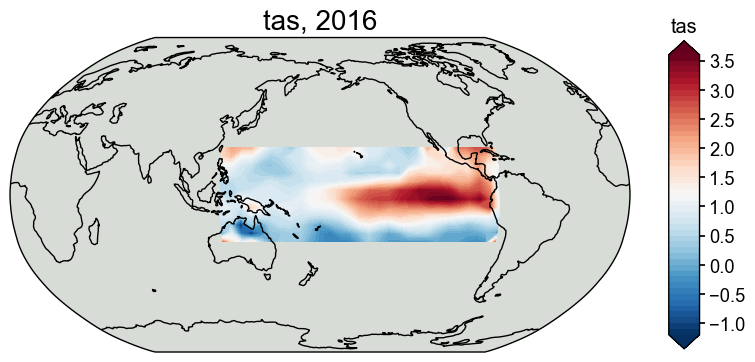

In [10]:
job.crop_clim(tag='obs', lat_min=-25, lat_max=25, lon_min=120, lon_max=280, verbose=True)
fig, ax = job.obs['tas'][-1].plot()

## GraphEM

In [11]:
job.prep_graphem(
    recon_period=(1801, 2000),  # period to reconstruct
    calib_period=(1901, 2000),  # period for calibration
    verbose=True,
)

>>> job.configs["recon_period"] = (1801, 2000)
>>> job.configs["recon_timescale"] = 1
>>> job.configs["calib_period"] = (1901, 2000)
>>> job.graphem_params["recon_time"] created
>>> job.graphem_params["calib_time"] created
>>> job.graphem_params["field_obs"] created
>>> job.graphem_params["calib_idx"] created
>>> job.graphem_params["field"] created
>>> job.graphem_params["df_proxy"] created
>>> job.graphem_params["proxy"] created
>>> job.graphem_params["lonlat"] created


In [15]:
job.run_graphem(
    save_dirpath='./recons/graphem-real-pages2k',
    graph_method='neighborhood',
    cutoff_radius=1500,
    verbose=True,
)

>>> job.configs["compress_params"] = {'zlib': True, 'least_significant_digit': 1}
>>> job.configs["save_dirpath"] = ./recons/graphem-real-pages2k
>>> job.configs["save_filename"] = job_r01_recon.nc
Computing a neighborhood graph with R = 1500.0 km
Estimating graph using neighborhood method


/glade/work/fengzhu/conda-envs/cfr-env/lib/python3.9/site-packages/graphem/GraphEstimation.py:191: RuntimeWarning: invalid value encountered in arcsin
  c = 2 * arcsin(sqrt(a))


Running GraphEM:



EM | dXmis: 0.0045; rdXmis: 0.0050:  17%|█▋        | 34/200 [12:59<1:03:25, 22.92s/it]

GraphEM.EM(): Tolerance achieved.
job.graphem_solver created and saved to: None
>>> job.recon_fields created
>>> Reconstructed fields saved to: ./recons/graphem-real-pages2k/job_r01_recon.nc


## Validation

In [12]:
res = cfr.ReconRes('./recons/graphem-real-pages2k', verbose=True)

>>> res.paths:
['./recons/graphem-real-pages2k/job_r01_recon.nc']


In [13]:
res.load(['nino3.4', 'tas'], verbose=True)

>>> ReconRes.recons["nino3.4"] created
>>> ReconRes.da["nino3.4"] created
>>> ReconRes.recons["tas"] created
>>> ReconRes.da["tas"] created


In [14]:
import scipy.io as sio
import numpy as np

data = sio.loadmat('./data/BC09_NINO34.mat')
start_yr = 1874
end_yr = 2000
nyr = end_yr-start_yr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][12+i*12:14+i*12])

ref_value = nino34
ref_time = np.arange(start_yr, end_yr+1)
ref_name = 'BC09'

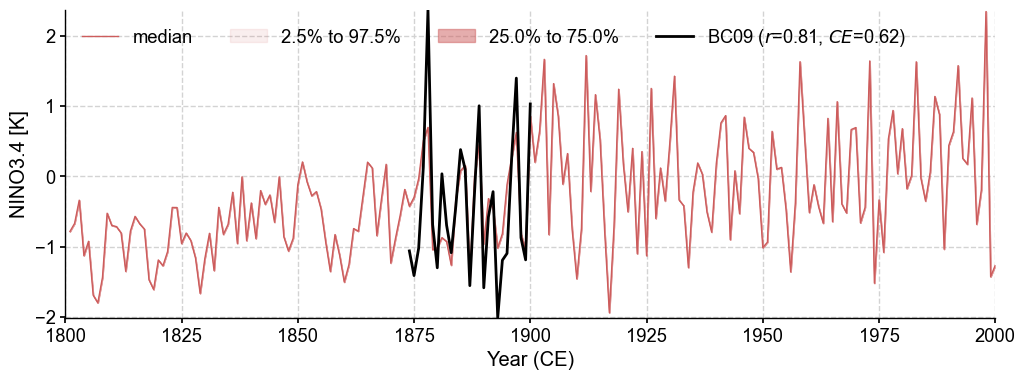

Figure saved at: "figs/valid_nino34.lmr_pages2k.BC09.pdf"


In [17]:
fig, ax = res.recons['nino3.4'].compare(
    ref_time, ref_value, ref_name, compare_period=(1874, 1900)).plot_qs()
ax.set_xlim(1800, 2000)
ax.set_ylabel('NINO3.4 [K]')
cfr.showfig(fig)
cfr.savefig(fig, './figs/valid_nino34.lmr_pages2k.BC09.pdf')

In [18]:
ref_fd_ann = job.obs['tas']

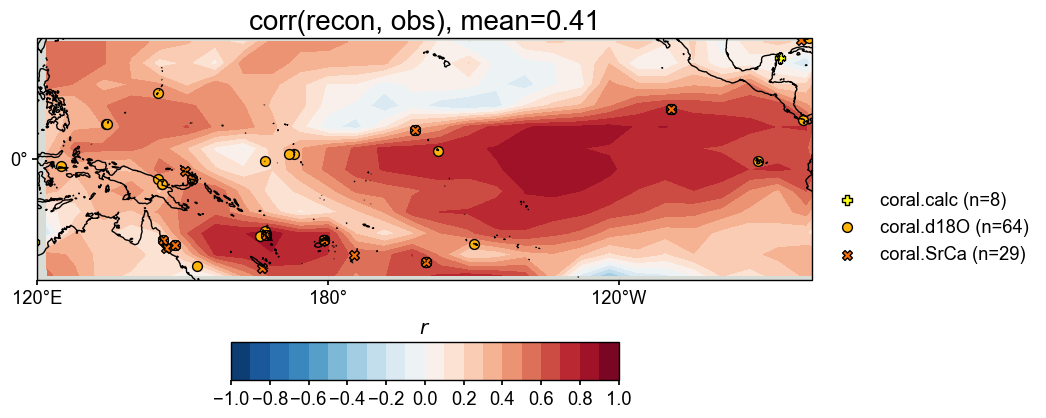

Figure saved at: "figs/valid_tas.graphem_pages2k.20CR.corr.pdf"


In [19]:
stat = 'corr'
valid_fd = res.recons['tas'].compare(
    ref_fd_ann, stat=stat,
    compare_period=(1874, 1900),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().value[0][0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-25, 25, 120, 280),
    plot_proxydb=True, proxydb=job.proxydb,
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/valid_tas.graphem_pages2k.20CR.{stat}.pdf')

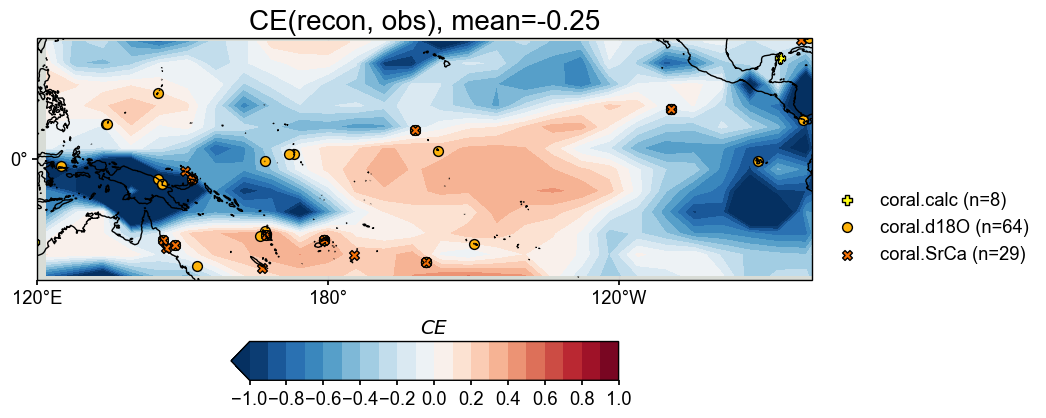

Figure saved at: "figs/valid_tas.graphem_pages2k.20CR.CE.pdf"


In [21]:
stat = 'CE'
valid_fd = res.recons['tas'].compare(
    ref_fd_ann, stat=stat,
    compare_period=(1874, 1900),
)
valid_fd.plot_kwargs.update({'cbar_orientation': 'horizontal', 'cbar_pad': 0.1})

fig, ax = valid_fd.plot(
    title=f'{stat}(recon, obs), mean={valid_fd.geo_mean().value[0][0]:.2f}',
    projection='PlateCarree',
    latlon_range=(-25, 25, 120, 280),
    plot_proxydb=True, proxydb=job.proxydb,
    proxydb_lgd_kws={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
)

cfr.showfig(fig)
cfr.savefig(fig, f'./figs/valid_tas.graphem_pages2k.20CR.{stat}.pdf')